# Imports

In [1]:
import os
import shutil
import copy
import matplotlib.pyplot as plt
import pandas

from molgroups.support import molstat
from molgroups.infotheory import entropy

print(os.getcwd())

# always use the same testdata
shutil.copyfile('./bu/sim0.dat', os.getcwd()+'/sim0.dat')
shutil.copyfile('./bu/sim1.dat', os.getcwd()+'/sim1.dat')
#shutil.copyfile('./bu/sim2.dat', os.getcwd()+'/sim2.dat')

/Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/data_fitting/SANS/ULV


'/Users/frank/Dropbox/My Mac (PN115993.campus.nist.gov)/Documents/programming/molgroups/examples/data_fitting/SANS/ULV/sim1.dat'

# Variables for example fit and optimization

In [2]:
# Run Optimization or only example fit and data simulation
RunOptimization=True

store = "T"
setupdir = os.getcwd()
runfile = "sansves"
fitsource = "SASView"

# remove store directory if it already exists, since we do not want to reload here
if os.path.isdir(os.path.join(setupdir, store)):
    shutil.rmtree(os.path.join(setupdir, store))

burn=5000
steps=100


# Create Short Example Fit

1.  The model needs to define fittable parameters with unique names, as shown below. For example, model0.scale and model1.scale would not be unique, since both parameters would be internally named 'scale' by bumps. In such a case, define parameters using the Parameter method and assign them to the models afterwards.

Test code. To be deleted later.

In [35]:
from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data, plot_data

from molgroups import mol
from molgroups import components as cmp
from molgroups import lipids

import numpy

dimension = 100
stepsize = 1
z = numpy.linspace(0.0, 99.0, 100, endpoint=True)

def bilayer(z, bulknsld, l_lipid1, l_lipid2, sigma=3.0, vf_bilayer=1.0):

    # Scale all SLDs from Refl1D units (1e-6 Ang^-2) to molgroups units (Ang^-2)
    bulknsld *= 1e-6

    blm.fnSet(sigma=sigma, bulknsld=bulknsld, startz=0, l_lipid1=l_lipid1, l_lipid2=l_lipid2, vf_bilayer=vf_bilayer)

    print(z)

    # Calculate scattering properties of volume occupied by bilayer
    normarea, area, nsl = blm.fnWriteProfile(z)

    # Fill in the remaining volume with buffer of appropriate nSLD
    nsld = nsl / (normarea * np.gradient(z)) + (1.0 - area / normarea) * bulknsld

    # export objects for post analysis, needs to be from this function
    #problem.bilayers = [blm]
    #problem.dimension = dimension
    #problem.stepsize = stepsize
    #problem.moldat = blm.fnWritePar2Dict({}, 'bilayer', np.arange(dimension) * stepsize)

    # Return nSLD profile in Refl1D units
    return nsld*1e6

DOPC = cmp.Lipid(name='DOPC', headgroup=lipids.PC, tails=[cmp.oleoyl, cmp.oleoyl], methyls=cmp.methyl)
blm = mol.BLM(lipids=[DOPC], lipid_nf=[1.0])

sldarr0 = bilayer(z, 3, 10, 10)
sldarr0

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


array([ 2.64068702,  2.57824262,  2.53898943,  2.51957611,  2.50263581,
        2.45942333,  2.35746056,  2.17291437,  1.89694175,  1.55649694,
        1.25343036,  0.85449355,  0.51037858,  0.24151948,  0.0486318 ,
       -0.08202886, -0.16960231, -0.23067954, -0.27529732, -0.30696456,
       -0.32515599, -0.32837207, -0.31629001, -0.29019151, -0.25153623,
       -0.1992209 , -0.12671916, -0.02083145,  0.1361753 ,  0.36027105,
        0.65672773,  1.01263935,  1.39577484,  1.76212454,  2.06967643,
        2.29211875,  2.42616475,  2.48985755,  2.51371904,  2.52921834,
        2.55908098,  2.61238697,  2.68527517,  2.7659776 ,  2.84141423,
        2.90236966,  2.94552126,  2.97249498,  2.98745409,  2.99483625,
        2.99808419,  2.99935984,  2.99980749,  2.99994793,  2.99998734,
        2.99999723,  2.99999946,  2.9999999 ,  2.99999998,  3.        ,
        3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
        3.        ,  3.        ,  3.        ,  3.        ,  3.  

Does not currently work, as the bilayer update is not supported this way.

In [33]:
%%writefile sansves.py

from bumps.names import *
from sasmodels.core import load_model
from sasmodels.bumps_model import Model, Experiment
from sasmodels.data import load_data, plot_data

from molgroups import mol
from molgroups import components as cmp
from molgroups import lipids

import numpy

# constants
dimension = 100
stepsize = 1
z = numpy.linspace(0, 99, 100, endpoint=True)

def bilayer(z, bulknsld, l_lipid1, l_lipid2, sigma=3.0, vf_bilayer=1.0):

    # Scale all SLDs from Refl1D units (1e-6 Ang^-2) to molgroups units (Ang^-2)
    bulknsld *= 1e-6

    blm.fnSet(sigma=sigma, bulknsld=bulknsld, startz=0, l_lipid1=l_lipid1, l_lipid2=l_lipid2, vf_bilayer=vf_bilayer)

    print(z)

    # Calculate scattering properties of volume occupied by bilayer
    normarea, area, nsl = blm.fnWriteProfile(z)

    # Fill in the remaining volume with buffer of appropriate nSLD
    nsld = nsl / (normarea * np.gradient(z)) + (1.0 - area / normarea) * bulknsld

    # export objects for post analysis, needs to be from this function
    #problem.bilayers = [blm]
    #problem.dimension = dimension
    #problem.stepsize = stepsize
    #problem.moldat = blm.fnWritePar2Dict({}, 'bilayer', np.arange(dimension) * stepsize)

    # Return nSLD profile in Refl1D units
    return nsld*1e6

### Define bilayer object
DOPC = cmp.Lipid(name='DOPC', headgroup=lipids.PC, tails=[cmp.oleoyl, cmp.oleoyl], methyls=cmp.methyl)
blm = mol.BLM(lipids=[DOPC], lipid_nf=[1.0])


# IMPORT THE DATA USED
data0 = load_data('sim0.dat')
data1 = load_data('sim1.dat')
#data2 = load_data('sim2.dat')

#setattr(data, 'qmin', 0.01)
#setattr(data, 'qmax', 10.0)

# DEFINE THE MODEL
# copied and initialized the custom model with up to 100 sld and thickness parameters in sasmodels/models
# a second hard-coded limit in sasmodels/modelinfo.py line 594 was manually increased from 20 to 120.
kernel = load_model('my_core_multi_shell')

pars0 = dict(scale=0.002, background=0.15, sld_core=3.0, sld_solvent=2.4, radius=60.0, radius_pd=0.3, n=100)
pars1 = dict(scale=0.002, background=0.15, sld_core=3.0, sld_solvent=3.4, radius=60.0, radius_pd=0.3, n=100)
#pars2 = dict(scale=0.002, background=0.15, sld=3.0, sld_solvent=4.4, radius=60.0, radius_pd=0.3)

model0 = Model(kernel, **pars0)
model1 = Model(kernel, **pars1)
#model2 = Model(kernel, **pars2)

# PARAMETER RANGES (ONLY THOSE PARAMETERS ARE FITTED)

background0 = Parameter(name='background0', value=0.4).range(0.01, 0.8)
background1 = Parameter(name='background1', value=0.4).range(0.01, 0.8)
#background2 = Parameter(name='background2', value=0.4).range(0.01, 0.8)
sld_solvent0 = sld_core0 =Parameter(name='sld_solvent0', value=2.0).range(-0.56, 6.4)
sld_solvent1 = sld_core1 = Parameter(name='sld_solvent1', value=2.0).range(-0.56, 6.4)
#sld_solvent2 = Parameter(name='sld_solvent2', value=2.0).range(-0.56, 6.4)

# bilayer specific parameters
l_lipid = Parameter(name='l_lipid', value=13).range(10., 16.)

model0.scale.range(0.0001, 0.05)
model0.background = background0
model0.sld_solvent = sld_solvent0
model0.sld_core = sld_core0
model0.radius.range(40., 120.)
model0.radius_pd.range(0.05, 0.7)

model1.scale = model0.scale
model1.background = background1
model1.sld_solvent = sld_solvent1
model1.sld_core = sld_core1
model1.radius = model0.radius
model1.radius_pd=model0.radius_pd

M0 = Experiment(data=data0, model=model0)
M1 = Experiment(data=data1, model=model1)
#M2 = Experiment(data=data2, model=model2)

problem = MultiFitProblem([M0, M1])
#problem = MultiFitProblem([M0, M1, M2])

#################################################
# bilayer update
# have to figure out how to do a dynamic update
# that's the code
sldarr0 = bilayer(z, model0.sld_solvent, l_lipid, l_lipid)
sldarr1 = bilayer(z, model1.sld_solvent, l_lipid, l_lipid)
for i in range(pars0['n']):
    s0 = getattr(model0, 'sld'+str(i+1))
    s0 = sldarr0[i]
    s1 = getattr(model1, 'sld'+str(i+1))
    s1 = sldarr1[i]
    t0 = getattr(model0, 'thickness'+str(i+1))
    t0 = 1.
    t1 = getattr(model1, 'thickness'+str(i+1))
    t1 = 1.


Overwriting sansves.py


2. Run Example Fit

In [34]:
fitobj = molstat.CMolStat(
    fitsource=fitsource,
    spath=setupdir,
    mcmcpath=store,
    runfile=runfile,
    state=None,
    problem=None,
)

fitobj.Interactor.fnRunMCMC(burn, steps, batch=False)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


TypeError: ufunc 'erf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Test Data Simulation

1. Show Best-fit parameters from above fit

In [5]:
df = pandas.read_csv(os.path.join(setupdir, store, runfile+'.par'), sep='\s+', header=None, names=['Parameter', 'Fit Value'])
df

,Parameter,Fit Value
0,background0,0.159001
1,radius,51.496854
2,radius_pd,0.622618
3,scale,0.025591
4,sld,1.772941
5,sld_solvent0,1.484119
6,background1,0.295564
7,sld_solvent1,1.718895


2. Define simulation model parameters. They are written out to simpar.dat. Please change to desired values or copy from dataframe above.

In [6]:
%%writefile simpar.dat
background0 0.159031
background1 0.295424
sld_solvent0 3.090
sld_solvent1 0.988
scale 0.0007
sld  1.355
radius  49.67
radius_pd 0.674

Overwriting simpar.dat


3. Define Instrument configurations. Each dataset can have its own instrument configuration. In the example below, a single configuration is assigned to all datasets. The configuration is made of three settings with different sample-detector distances.

In [7]:
# buffer is not subtracted but treated as a fitting parameter
sb = 0.0

configuration_dataset1 = [{'lambda': 6.0,
                            "sample_detector_distance": 100,
                            'source_sample_distance': 387.6,
                            'source_aperture_radius':5.08*0.5,
                            'sample_aperture_radius':1.27*0.5,
                            "beamstop_diameter": 10.16,
                            "neutron_flux": 9e5,
                            'time': 1200,
                            'beam_center_x': 25,
                            "dlambda_lambda":0.136,
                            "differential_cross_section_buffer": sb,
                            "cuvette_thickness": 0.1},
                          {'lambda': 6.0,
                           "sample_detector_distance": 400,
                           'source_sample_distance': 850.05,
                           'source_aperture_radius':5.08*0.5,
                           'sample_aperture_radius':1.27*0.5,
                           "beamstop_diameter": 10.16,
                           "neutron_flux": 2e5,
                           'time': 2400,
                           "dlambda_lambda":0.136,
                           "differential_cross_section_buffer": sb,
                           "cuvette_thickness": 0.1},
                         {'lambda': 6.0,
                          "sample_detector_distance": 1300,
                          'source_sample_distance': 1467,
                          'source_aperture_radius':5.08*0.5,
                          'sample_aperture_radius':1.27*0.5,
                          "dlambda_lambda":0.136,
                          "beamstop_diameter": 7.62,
                          "neutron_flux": 8e4,
                          'time': 3600,
                          "differential_cross_section_buffer": sb,
                          "cuvette_thickness": 0.1}]

configuration = [configuration_dataset1, copy.deepcopy(configuration_dataset1)]

4. Visually check configuration.

In [8]:
df = pandas.DataFrame.from_dict(configuration_dataset1)
df

,lambda,sample_detector_distance,source_sample_distance,source_aperture_radius,sample_aperture_radius,beamstop_diameter,neutron_flux,time,beam_center_x,dlambda_lambda,differential_cross_section_buffer,cuvette_thickness
0,6.0,100,387.60,2.54,0.635,10.16,900000.0,1200,25.0,0.136,0.0,0.1
1,6.0,400,850.05,2.54,0.635,10.16,200000.0,2400,NaN,0.136,0.0,0.1
2,6.0,1300,1467.00,2.54,0.635,7.62,80000.0,3600,NaN,0.136,0.0,0.1


5. Simulate data.

In [9]:
fitobj.fnSimulateData(basefilename='sim.dat', liConfigurations=configuration, qmin=0.001, qmax=0.8, t_total=None)

            par      value
0   background0   0.159031
1   background1   0.295424
2  sld_solvent0   3.090000
3  sld_solvent1   0.988000
4         scale   0.000700
5           sld   1.355000
6        radius  49.670000
7     radius_pd   0.674000
[[{'lambda': 6.0, 'sample_detector_distance': 100, 'source_sample_distance': 387.6, 'source_aperture_radius': 2.54, 'sample_aperture_radius': 0.635, 'beamstop_diameter': 10.16, 'neutron_flux': 900000.0, 'time': 1200, 'beam_center_x': 25, 'dlambda_lambda': 0.136, 'differential_cross_section_buffer': 0.0, 'cuvette_thickness': 0.1}, {'lambda': 6.0, 'sample_detector_distance': 400, 'source_sample_distance': 850.05, 'source_aperture_radius': 2.54, 'sample_aperture_radius': 0.635, 'beamstop_diameter': 10.16, 'neutron_flux': 200000.0, 'time': 2400, 'dlambda_lambda': 0.136, 'differential_cross_section_buffer': 0.0, 'cuvette_thickness': 0.1}, {'lambda': 6.0, 'sample_detector_distance': 1300, 'source_sample_distance': 1467, 'source_aperture_radius': 2.54, '

C:\Users\Frank Heinrich\PycharmProjects\molgroups\molgroups\support\api_base.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liData[i][1] = liData[i][1].append(newframe, ignore_index=True)
C:\Users\Frank Heinrich\PycharmProjects\molgroups\molgroups\support\api_base.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liData[i][1] = newframe.append(liData[i][1], ignore_index=True)
C:\Users\Frank Heinrich\anaconda3\envs\Python38\lib\site-packages\sasmodels\bumps_model.py:243: RuntimeWarning: divide by zero encountered in true_divide
  return (self.theory() - self.Iq) / self.dIq
C:\Users\Frank Heinrich\anaconda3\envs\Python38\lib\site-packages\sasmodels\bumps_model.py:243: RuntimeWarning: divide by zero encountered in true_divide
  return (self.theory() - self.Iq) / self.dIq


### Compare original and simulated data.
1. Compare Data

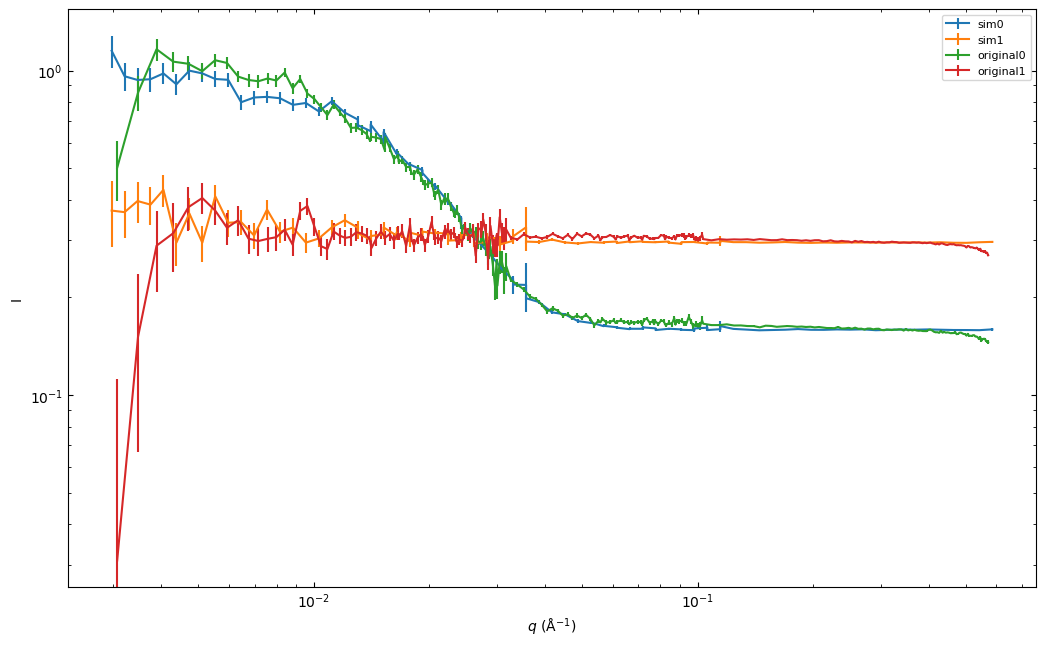

In [10]:
import pandas

fig, ax = plt.subplots()

original0 = pandas.read_csv('bu/sim0.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata0 = pandas.read_csv('sim0.dat', sep=' ', skip_blank_lines=True,comment='#')
original1 = pandas.read_csv('bu/sim1.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata1 = pandas.read_csv('sim1.dat', sep=' ', skip_blank_lines=True,comment='#')

ax.errorbar(simdata0['Q'], simdata0['I'], simdata0['dI'], label="sim0")
ax.errorbar(simdata1['Q'], simdata1['I'], simdata1['dI'], label="sim1")
ax.errorbar(original0['Q'], original0['I'], original0['dI'], label="original0")
ax.errorbar(original1['Q'], original1['I'], original1['dI'], label="original1")

ax.legend(fontsize=8)
ax.set_ylabel("I", fontsize=10)
ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(1e-2, 1e8)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


2. Compare Uncertainties

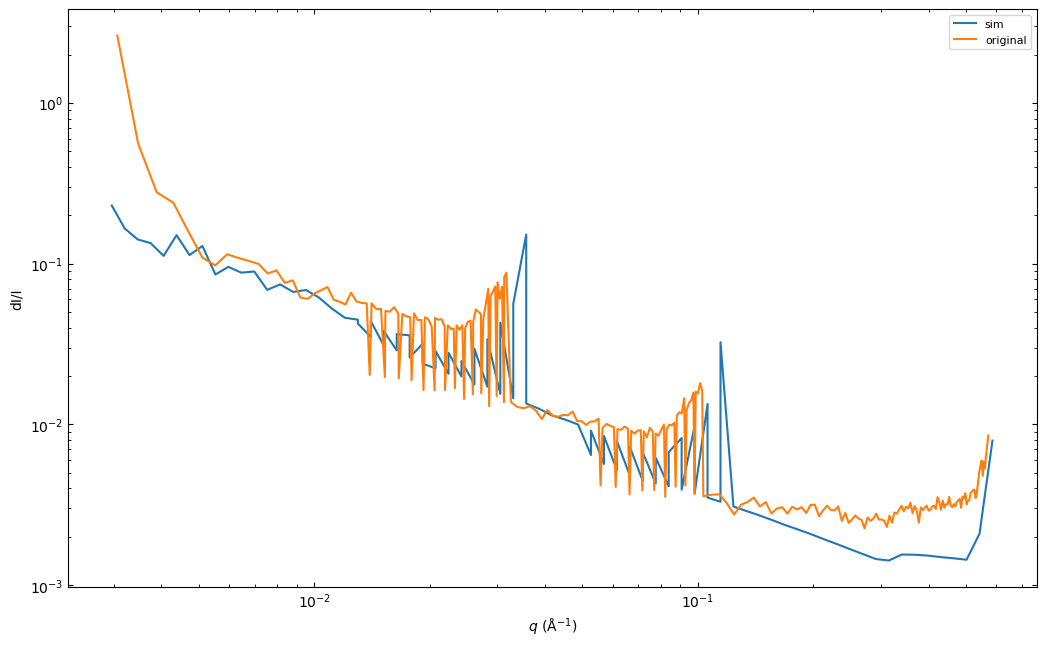

In [11]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim1.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim1.dat', sep=' ', skip_blank_lines=True,comment='#')

ax.plot(simdata['Q'], (simdata['dI']/simdata['I']), label="sim")
ax.plot(original['Q'], (original['dI']/original['I']), label="original")

ax.legend(fontsize=8)
ax.set_ylabel("dI/I", fontsize=10)
ax.set_yscale('log')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(0, 0.25)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


3. Compare resolutions

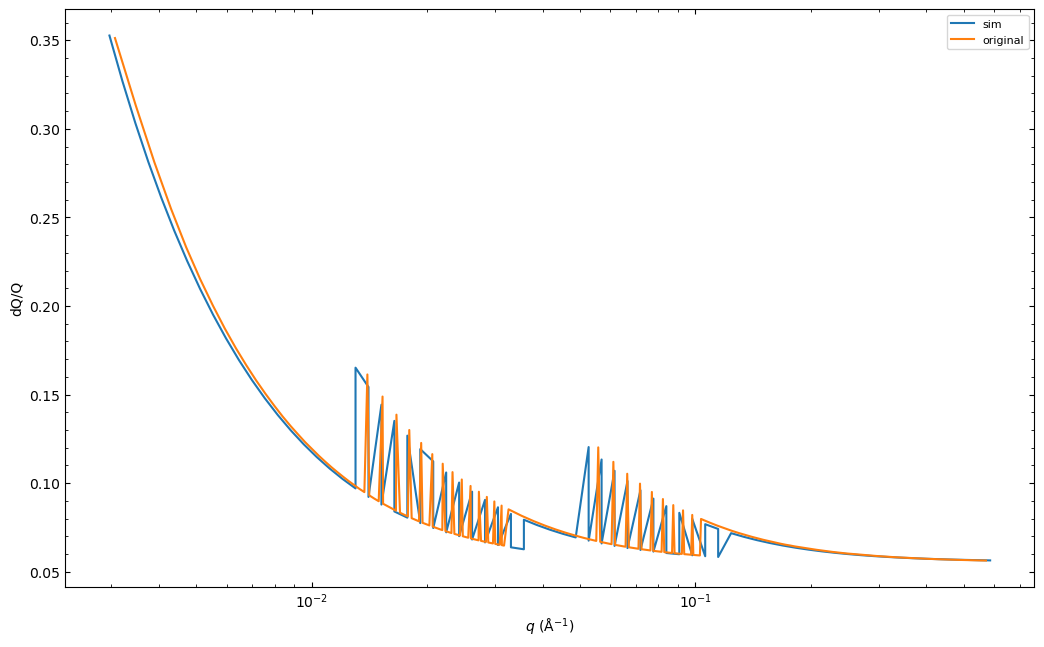

In [12]:
fig, ax = plt.subplots()

#i = 0
#while os.path.isfile('testdata.DAT'):
original = pandas.read_csv('bu/sim0.dat', sep=' ', skip_blank_lines=True,comment='#')
simdata = pandas.read_csv('sim0.dat', sep=' ', skip_blank_lines=True,comment='#')
ax.plot(simdata['Q'], (simdata['dQ']/simdata['Q']), label="sim")
ax.plot(original['Q'], (original['dQ']/original['Q']), label="original")

ax.legend(fontsize=8)
ax.set_ylabel("dQ/Q", fontsize=10)
ax.set_yscale('linear')
ax.set_xscale('log')
ax.minorticks_on()
ax.tick_params(which="both", direction="in", labelsize=10)
ax.tick_params(bottom=True, top=True, left=True, right=True, which="both")
ax.set_xlabel("$q$ (Å$^{-1}$)", fontsize=10)
ax.figure.set_size_inches(12.5, 7.5)
#ax.set_ylim(0, 0.01)
plt.savefig(store + "/model_comparison.png", facecolor="white")
plt.show()


# Experimental Optimization

1. Create a data file (entropypar.dat) that sets the values and fit ranges for model parameters, values for configuration parameters, and designates paramters to optimize.

* Entropypar.dat contains a list of all fit parameters with a designation, whether they are marginal (d) or nuisance (i) parameters. This is followed by the parameter name, the initial parameter value, and the fit boundaries.
* Configuration parameters are given by a preceeding n x y, where x is the data set it applies to and y the configuration number. Specifying x,y = '*' makes this parameter apply to all configurations.
* Any numbers x y following a fit parameter indicates that this paramter is used for this particular dataset/configuration to determine the background (incoherent crosssection). This typically applies to SLDs. The 'mode' argument for entropy.Entropy() then determines whether this is to be interpreted as an aqueous solvent or other. Sometimes, instead of subtracting an incoherent crosssection from the data, a background parameter is retained in the model. If any of the parameters is asigned an x = bi, this background will be se to the incoherent (isotropic) crosssection of the ith data set, instead of applying this value to the configuration. Fit boundaries for such backgrounds must be large enough to encompass all possible outcomes. They will not be updated dynamically.
* If three more numbers are given, this designates that an information content search over this parameter is performed (start, stop, step).
* A preceding f (fi or fd) at the beginning of the line indicates that the fit boundaries for such a search parameter are fixed (for example for volume fractions between 0 and 1), otherwise the fit boundary moves according to the varied parameter and the initally given fit boundaries.
* If an instrumental parameter is specified for one data set, the instrumental parameter needs to be specified for all other datasets, as well.
* Data filenames are currently limited to sim.dat for a single file fit, or simx.dat, x = 0 ... n, for fits with multiple data sets

In [13]:
text = [
        'i b0 * background0 0.509283 0.0 2.0',
        'i b1 * background1 0.295525 0.0 2.0',
        'i 0 * sld_solvent0 2.0 1.98 2.02 1.5 4.5 0.1',
        'i 1 * sld_solvent1 2.0 1.98 2.02 1.5 4.5 0.1',
        'i _ _ scale 0.0013 0.0001 0.005',
        'd _ _ sld  3.1 1.0 4.0',
        'i _ _ radius  65 40 90',
        'i _ _ radius_pd  0.3 0.1 0.5',
        'n * * lambda 6.00',
        'n * * differential_cross_section_buffer 0.0',
        'n * 0 sample_detector_distance 100',
        'n * 1 sample_detector_distance 400',
        'n * 2 sample_detector_distance 1300',
        'n * 0 source_sample_distance 387.6',
        'n * 1 source_sample_distance 850.05',
        'n * 2 source_sample_distance 1467',
        'n * 0 neutron_flux 9e5',
        'n * 1 neutron_flux 2e5',
        'n * 2 neutron_flux 8e4',
        'n * * source_aperture_radius 2.54',
        'n * * sample_aperture_radius 0.635',
        'n * * dlambda_lambda 0.136',
        'n * 0 beamstop_diameter 10.16',
        'n * 1 beamstop_diameter 10.16',
        'n * 2 beamstop_diameter 7.62',
        'n * 0 time 1200',
        'n * 1 time 2400',
        'n * 2 time 3600',
        'n * 0 beam_center_x 25.',
        'n * * cuvette_thickness 0.1'
        ]

f=open('entropypar.dat', 'w')
f.writelines(line + '\n' for line in text)
f.close()

header_names = ['type', 'dataset', 'config.', 'parameter', 'value', 'l_fit', 'u_fit', 'l_opt', 'u_opt', 'step_opt']
df = pandas.read_csv('entropypar.dat', sep='\s+', header=None, names=header_names, skip_blank_lines=True, comment='#')
df

,type,dataset,config.,parameter,value,l_fit,u_fit,l_opt,u_opt,step_opt
0,i,b0,*,background0,0.509283,0.0000,2.000,NaN,NaN,NaN
1,i,b1,*,background1,0.295525,0.0000,2.000,NaN,NaN,NaN
2,i,0,*,sld_solvent0,2.000000,1.9800,2.020,1.5,4.5,0.1
3,i,1,*,sld_solvent1,2.000000,1.9800,2.020,1.5,4.5,0.1
4,i,_,_,scale,0.001300,0.0001,0.005,NaN,NaN,NaN
5,d,_,_,sld,3.100000,1.0000,4.000,NaN,NaN,NaN
6,i,_,_,radius,65.000000,40.0000,90.000,NaN,NaN,NaN
7,i,_,_,radius_pd,0.300000,0.1000,0.500,NaN,NaN,NaN
8,n,*,*,lambda,6.000000,NaN,NaN,NaN,NaN,NaN
9,n,*,*,differential_cross_section_buffer,0.000000,NaN,NaN,NaN,NaN,NaN


2. Optimization-specific parameters

In [14]:
# enforced qmin and qmax, even if detector would cover larger q-range
# alternatively: take enforced q-range from first provided data file (index 0)
# set total counting time for the entire experiment (in s), or None
# number of gpcam iterations, if gpcam is used
qmin = 0.001
qmax = 0.8
qrangefromfile = False
t_total = None
gpcam_iterations = 200
optimizer = 'gpcam'

# Acquisition Functions. Use "variance" for pure exploration, 'maximum' to zero in on an already identified information gain maximum, 'ucb' for an exploration-exploitation balance, and 'shannon_ig_vec' for a maximization in information gain.
acq_func='variance'

# isotropic scattering background
# user-defined linear relationship between a SLD of the bulk solvent and the differential macroscopic scattering crosssection of the buffer
cross_section_background = {'slope':-0.1626, 'y_intercept': 0.7980}
mode = 'SANS_linear'

# Prepare gpcam to keep plots for individual iterations and make fine enough steps between record keeping. Useful for constructing a movie.
# If not needed, set keep_plots to False, init dataset size to 20, do not show support points, and set gpcam steps to None
keep_plots = True
gpcam_init_dataset_size = 20  # usually 20
show_support_points = True
gpcam_step = 4                # at least 2 to make use of local and global optimization

# particular entropy setup
convergence = 2.0
miniter = 3
bClusterMode = False
bFetchMode = False
time = 2
bcalcsymmetric = True
upper_info_plotlevel = None
plotlimits_filename = ""
calcsingle = False

# setup batchscript for SLURM (if used)
script = ['#!/bin/bash\n',
          '#SBATCH --job-name=entro {mcmc_iteration}\n',
          '#SBATCH -A mc4s9np\n', '#SBATCH -p RM\n',
          '#SBATCH -t 0' + str(time) + ':00:00\n',
          '#SBATCH -N 4\n', '#SBATCH --ntasks-per-node 28\n',
          '\n',
          'set +x\n',
          'cd $SLURM_SUBMIT_DIR\n',
          '\n',
          'module load python/2.7.11_gcc\n',
          'export PYTHONPATH=/home/hoogerhe/bin/lib/python2.7/site-packages:/home/hoogerhe/src/bumps\n',
          '\n',
          'mpirun -np 112 python /home/hoogerhe/src/refl1d/bin/refl1d_cli.py {mcmc_dirname}/run.py --fit=dream --mpi --init=lhs --batch --pop=28 --time='
          + str(float(time) - 0.1) + ' --thin=20 --store={mcmc_dirname}/save --burn=' + str(burn)
          + ' --steps=' + str(steps) + '\n'
          ]
# script.append('cd '+dirname+'\n')


3. Run Optimization

In [15]:
entr = entropy.Entropy(
    fitsource=fitsource,
    spath=setupdir,
    mcmcpath=store,
    runfile=runfile,
    mcmcburn=burn,
    mcmcsteps=steps,
    convergence=convergence,
    miniter=miniter,
    mode=mode,
    background_rule = cross_section_background,
    bClusterMode=bClusterMode,
    bFetchMode=bFetchMode,
    calc_symmetric=bcalcsymmetric,
    upper_info_plotlevel=upper_info_plotlevel,
    plotlimits_filename=plotlimits_filename,
    slurmscript=script,
    configuration = configuration,
    keep_plots = keep_plots,
    optimizer = optimizer,
    show_support_points = show_support_points
)

if RunOptimization:
    entr.run_optimization(qmin=qmin, qmax=qmax, qrangefromfile=qrangefromfile, t_total=t_total, gpcam_iterations=gpcam_iterations, jupyter_clear_output=True, gpcam_init_dataset_size=gpcam_init_dataset_size, gpcam_step=gpcam_step, acq_func=acq_func)

This is the current length of the data received by gpCAM:  1
Suggested by gpCAM:  [{'position': array([2.23151313, 2.06709242]), 'value': None, 'variance': None, 'cost': None, 'id': '8eea4549-313d-4702-9028-ce9c08b28909', 'time stamp': 1669997361.7728996, 'date time': '02/12/2022_11:09:21', 'measured': False, 'hyperparameters': array([1.63097272, 0.41387604, 0.3791703 ]), 'posterior std': 0.39801866711949463}]
No problem to reload.
                                  par          value
0                         background0       0.472800
1                         background1       0.472800
2                        sld_solvent0       2.231513
3                        sld_solvent1       2.067092
4                               scale       0.001300
5                                 sld       3.100000
6                              radius      65.000000
7                           radius_pd       0.300000
8                              lambda       6.000000
9   differential_cross_section_buf

C:\Users\Frank Heinrich\anaconda3\envs\Python38\lib\site-packages\sasmodels\bumps_model.py:243: RuntimeWarning: divide by zero encountered in true_divide
  return (self.theory() - self.Iq) / self.dIq
C:\Users\Frank Heinrich\PycharmProjects\molgroups\molgroups\support\api_base.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liData[i][1] = liData[i][1].append(newframe, ignore_index=True)
C:\Users\Frank Heinrich\PycharmProjects\molgroups\molgroups\support\api_base.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  liData[i][1] = newframe.append(liData[i][1], ignore_index=True)
C:\Users\Frank Heinrich\anaconda3\envs\Python38\lib\site-packages\sasmodels\bumps_model.py:243: RuntimeWarning: divide by zero encountered in true_divide
  return (self.theory() - self.Iq) / self.dIq
C:\Users\Frank Heinrich\anaconda3\

# steps: 100, # draws: 8000
-- Model 0 sim0.dat
.background = background0 = 0.473115 in [0.01,0.8]
.radius = 84.2958 in [40,120]
.radius_pd = 0.123828 in [0.05,0.7]
.radius_pd_n = 35
.radius_pd_nsigma = 3
.scale = 0.00100097 in [0.0001,0.05]
.sld = 3.16808 in [1,4]
.sld_M0 = 0
.sld_mphi = 0
.sld_mtheta = 0
.sld_solvent = sld_solvent0 = 2.24189 in [2.21151,2.25151]
.sld_solvent_M0 = 0
.sld_solvent_mphi = 0
.sld_solvent_mtheta = 0
.up_angle = 0
.up_frac_f = 0
.up_frac_i = 0
.up_phi = 0

[chisq=0.806(75), nllf=37.9035]
-- Model 1 sim1.dat
.background = background1 = 0.472485 in [0.01,0.8]
.radius = 84.2958 in [40,120]
.radius_pd = 0.123828 in [0.05,0.7]
.radius_pd_n = 35
.radius_pd_nsigma = 3
.scale = 0.00100097 in [0.0001,0.05]
.sld = 3.16808 in [1,4]
.sld_M0 = 0
.sld_mphi = 0
.sld_mtheta = 0
.sld_solvent = sld_solvent1 = 2.08184 in [2.04709,2.08709]
.sld_solvent_M0 = 0
.sld_solvent_mphi = 0
.sld_solvent_mtheta = 0
.up_angle = 0
.up_frac_f = 0
.up_frac_i = 0
.up_phi = 0

[chisq=0.957(75)

4. Show Plots

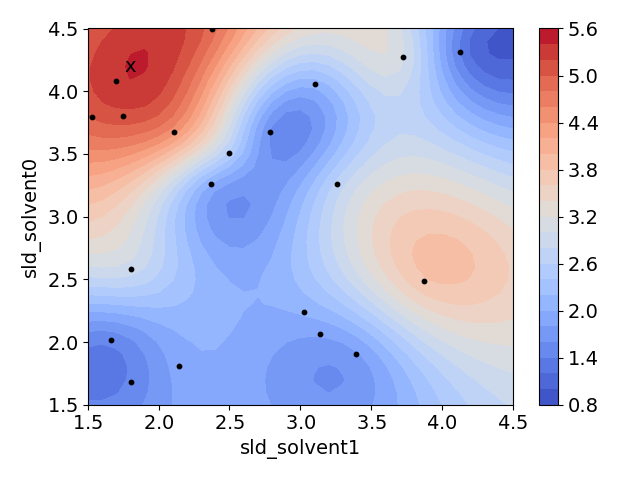

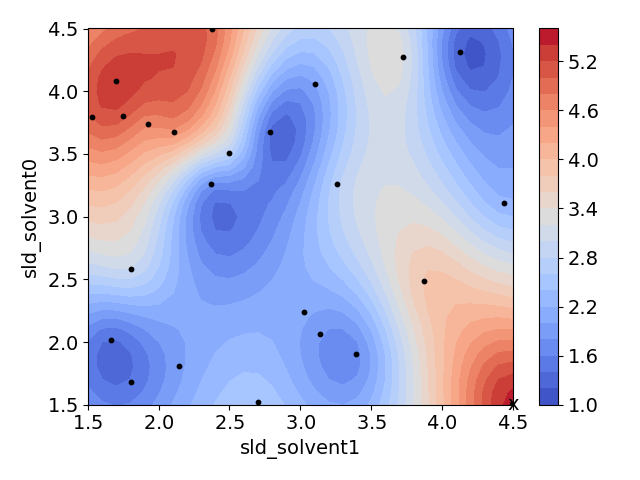

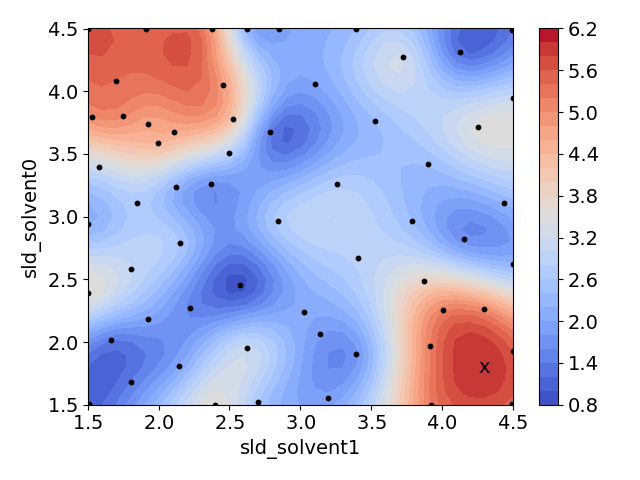

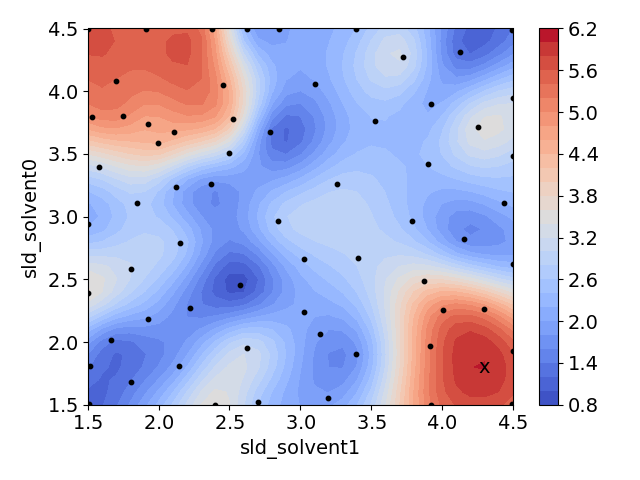

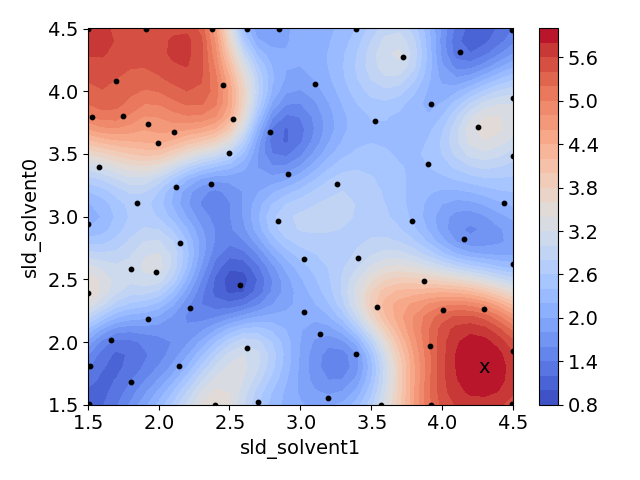

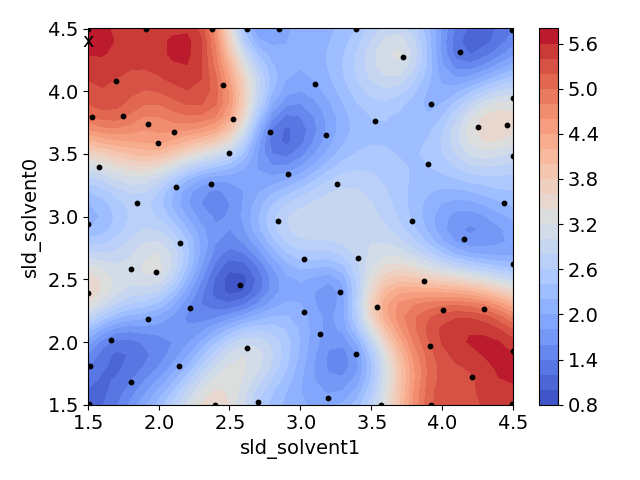

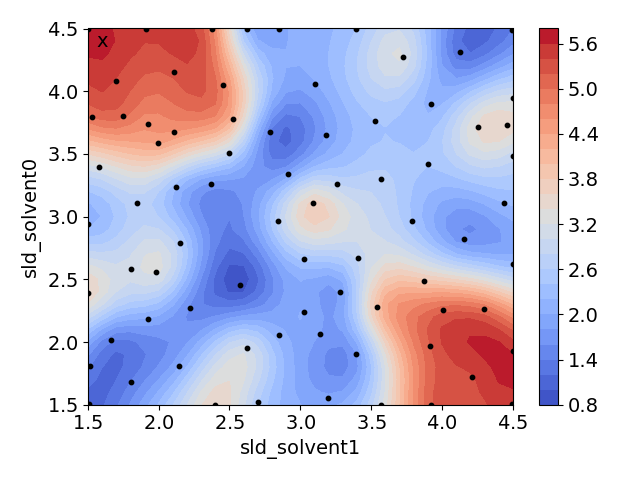

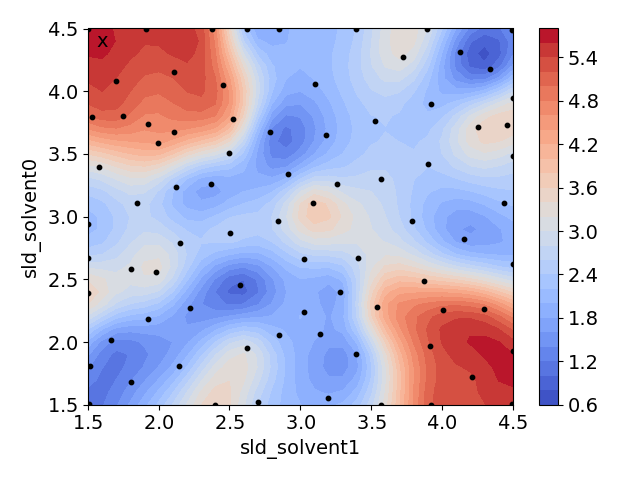

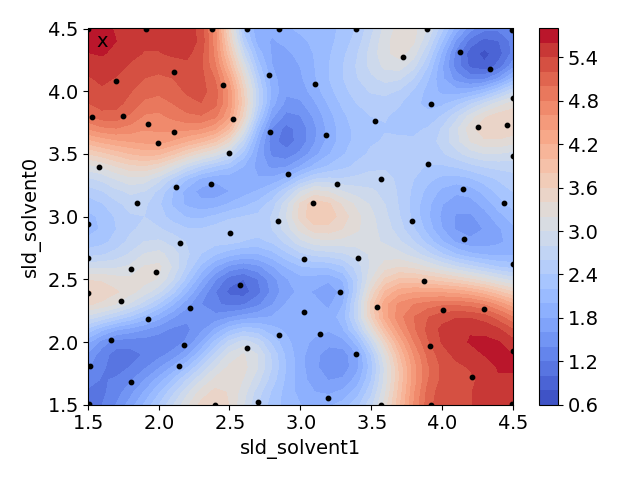

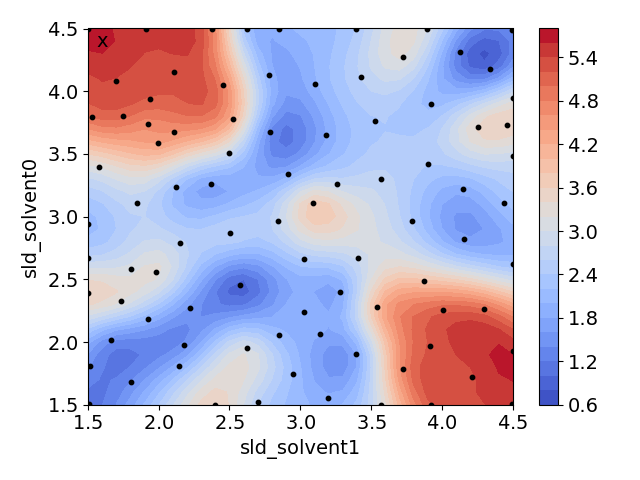

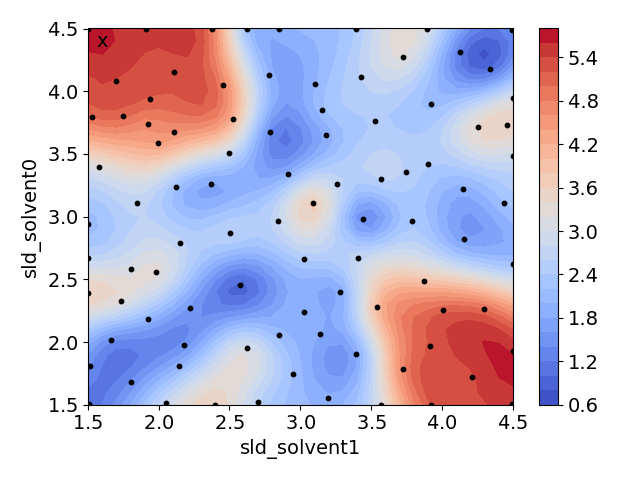

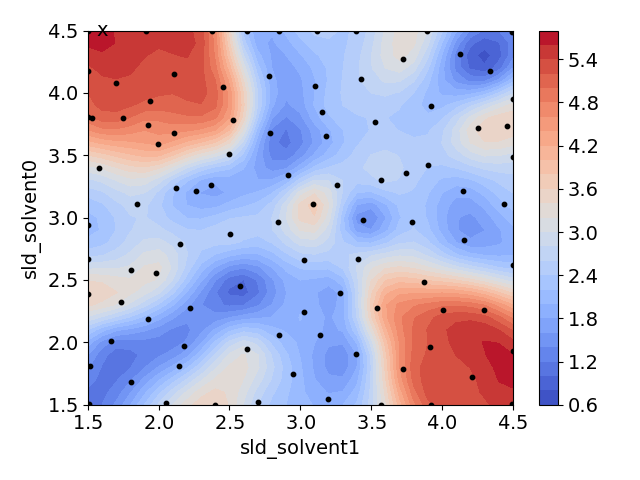

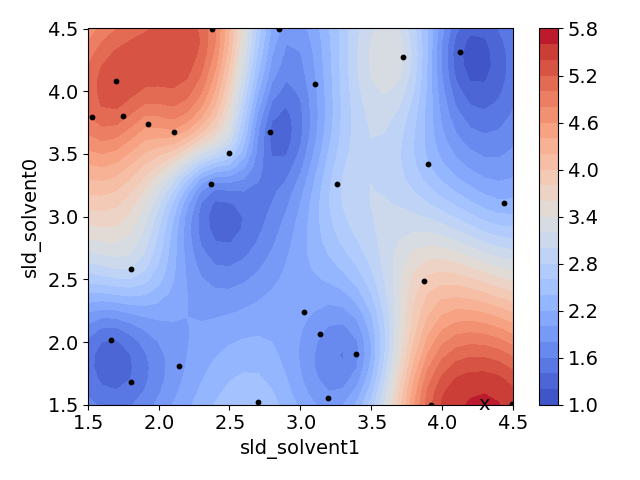

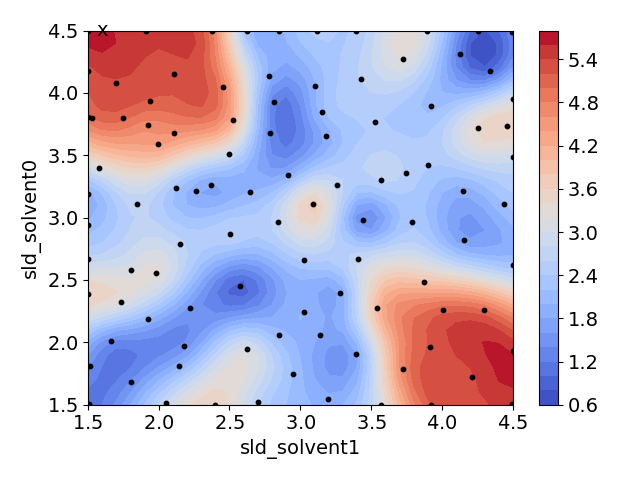

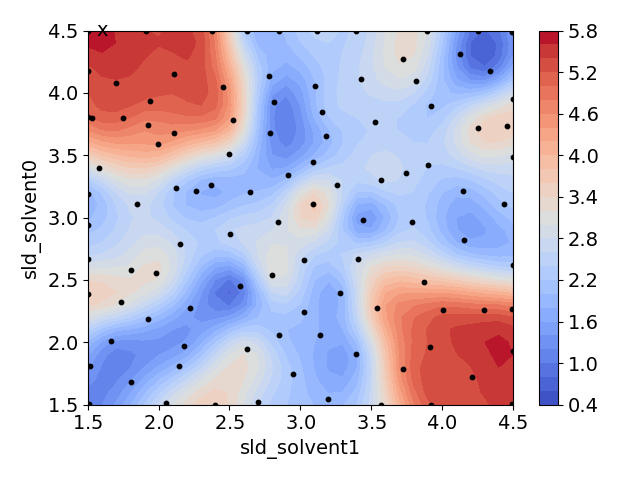

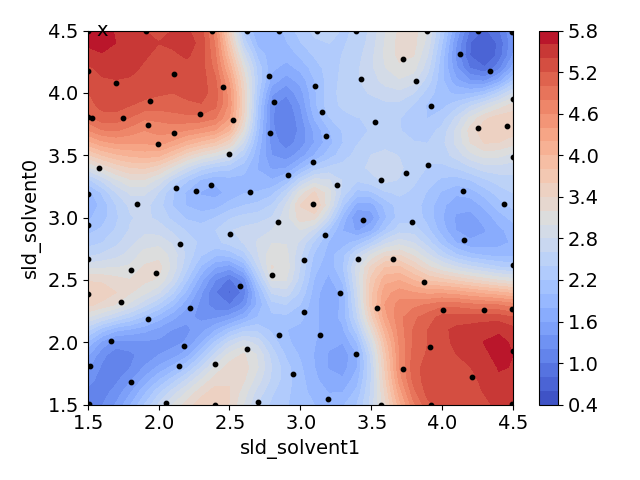

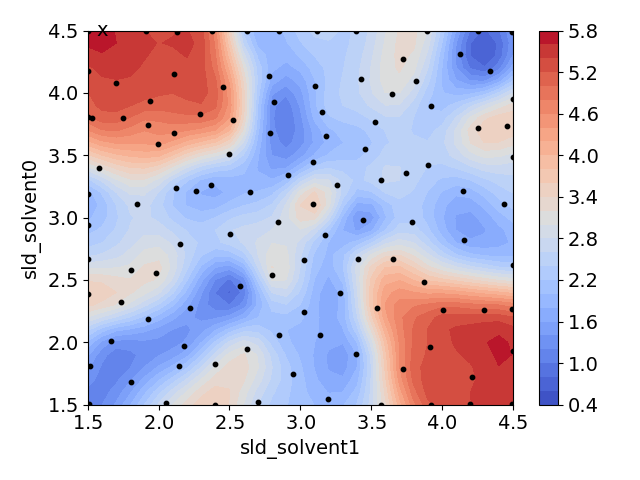

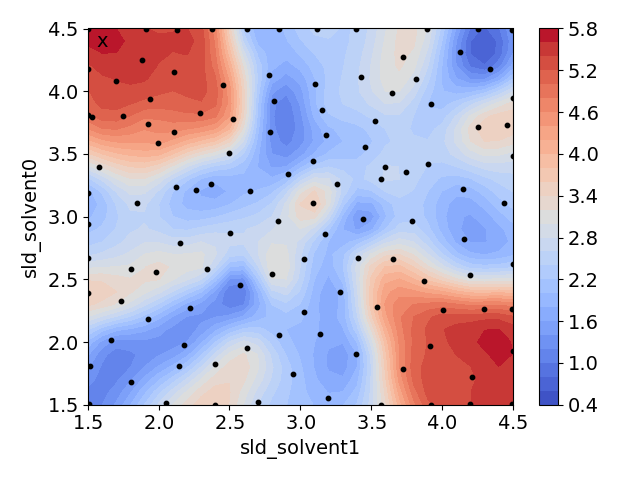

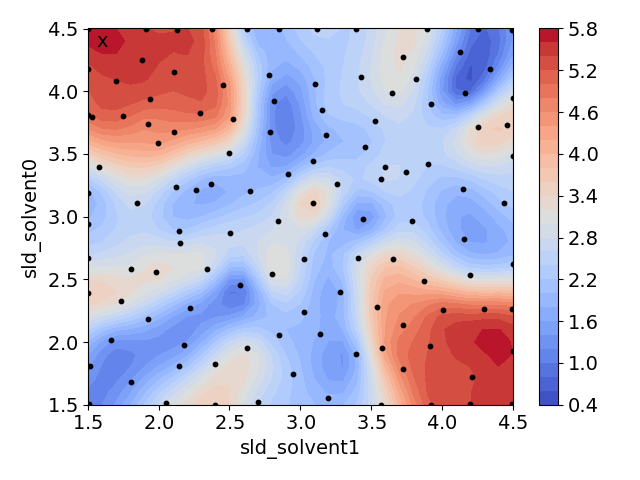

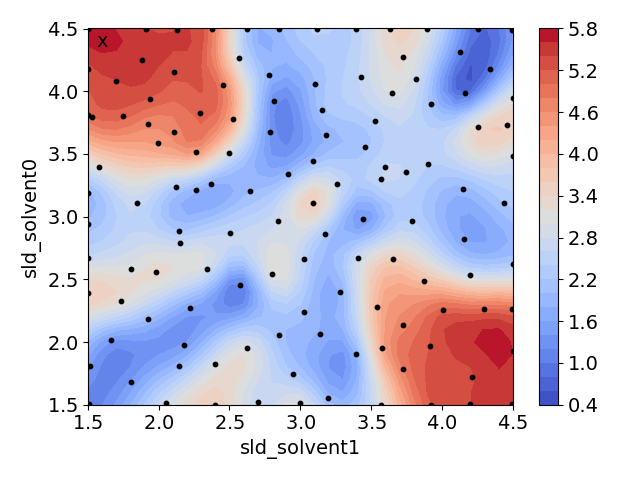

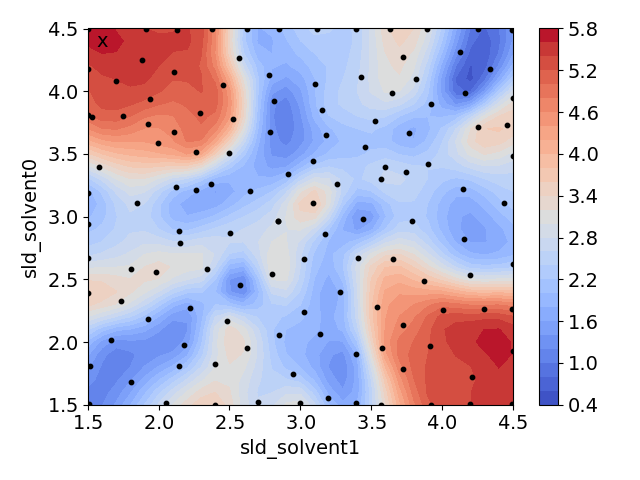

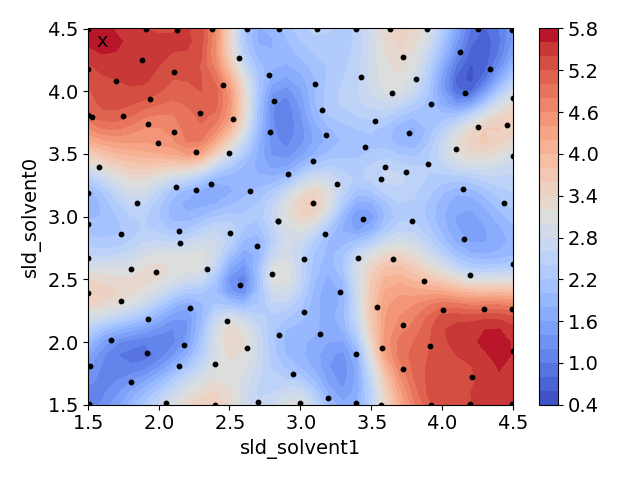

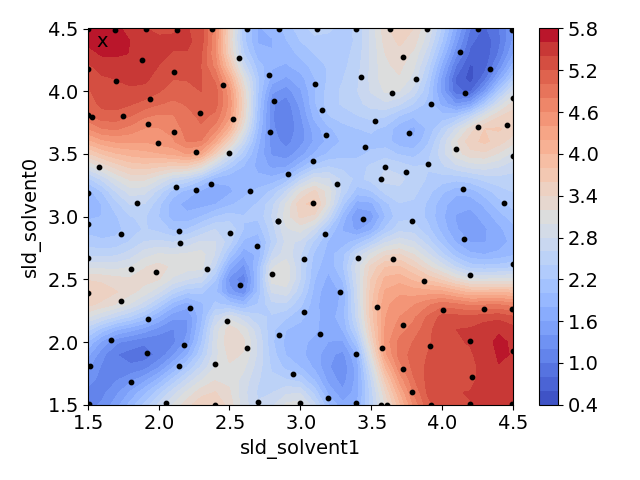

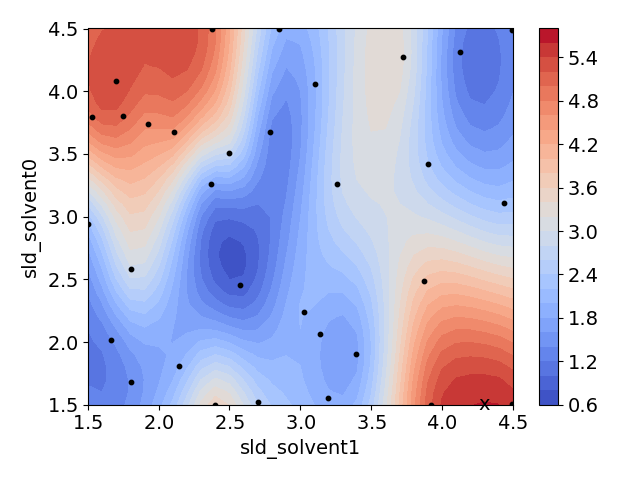

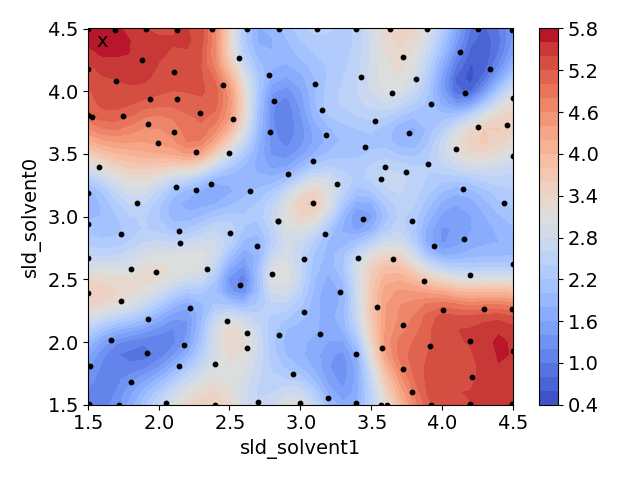

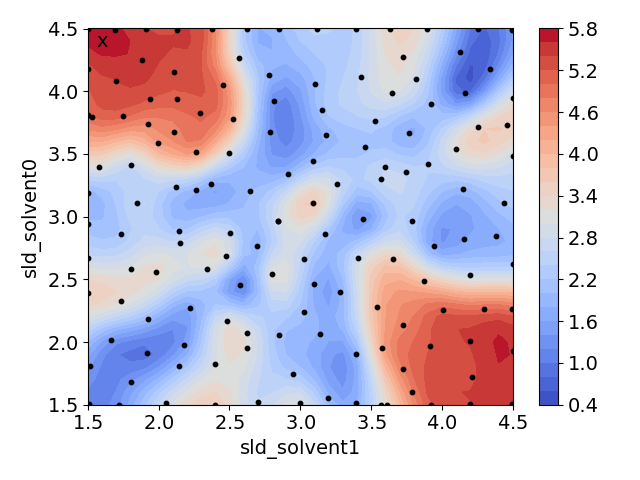

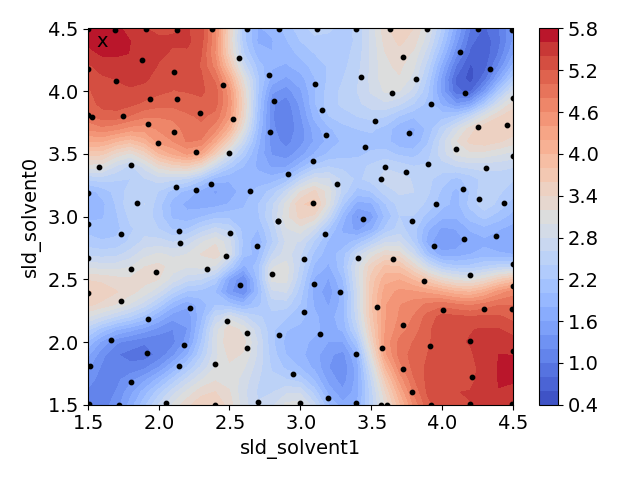

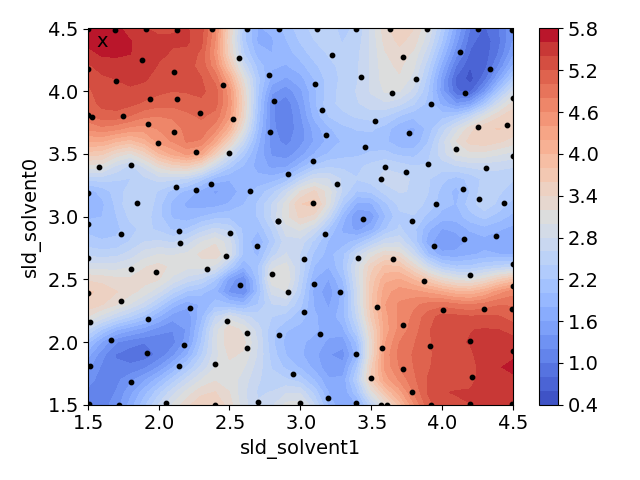

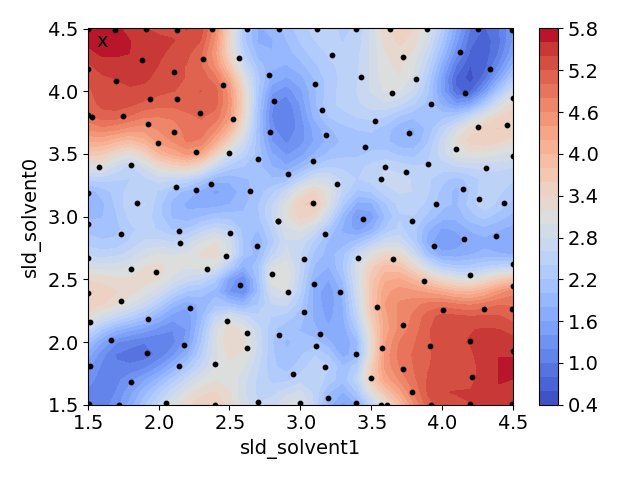

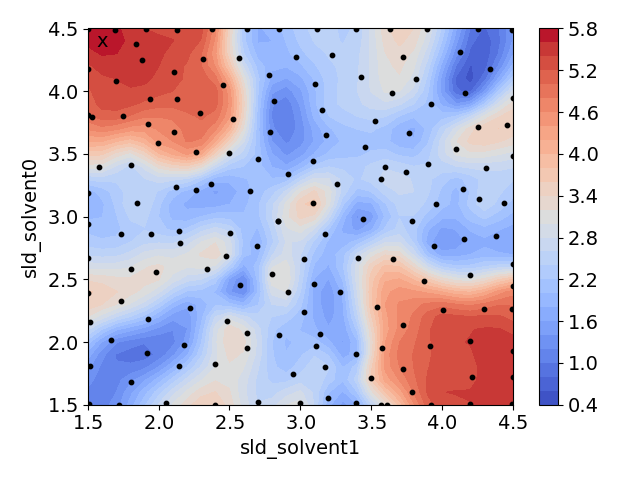

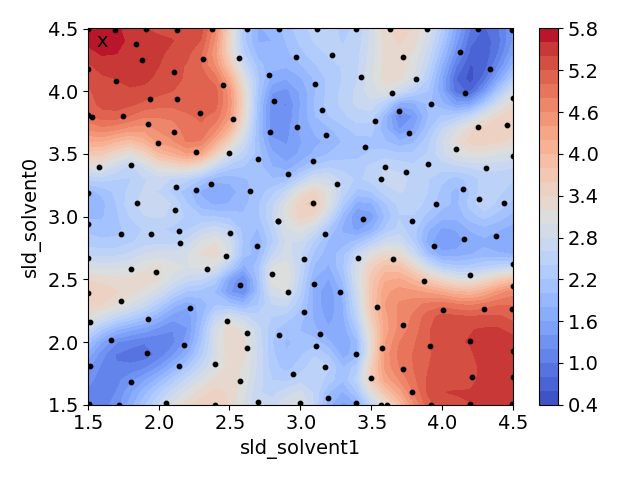

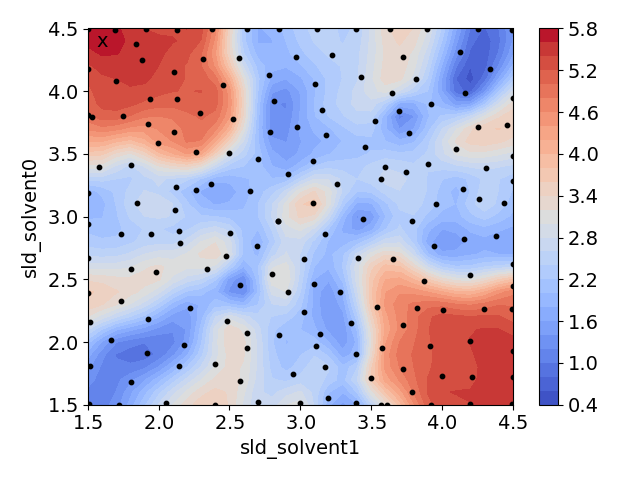

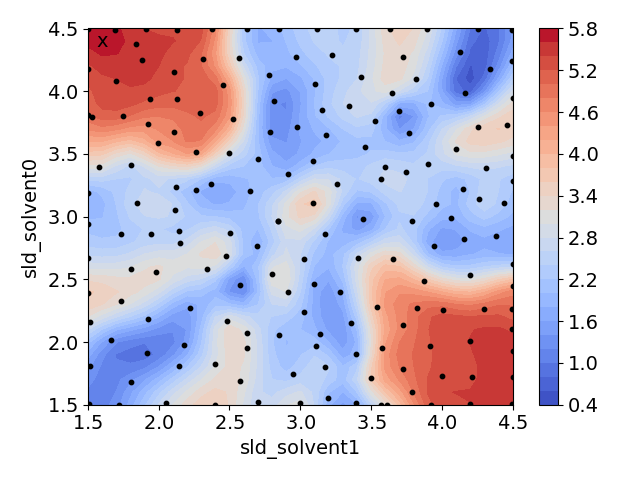

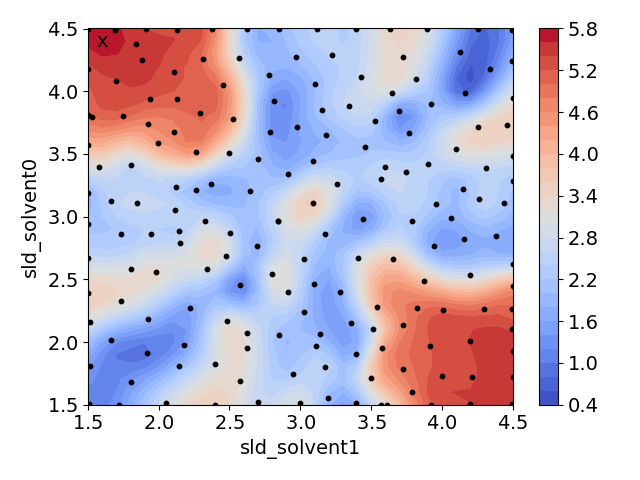

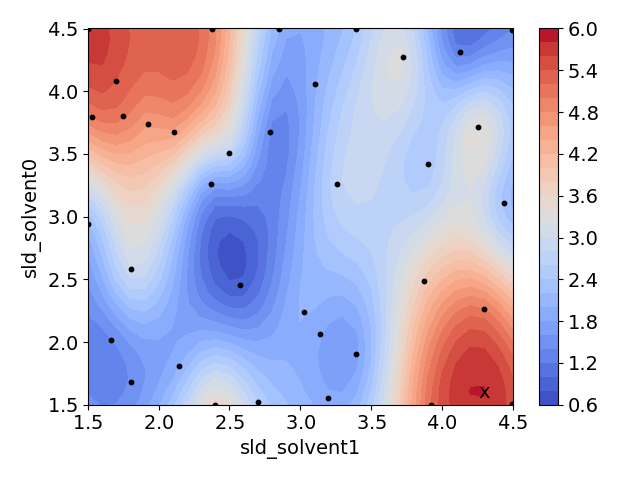

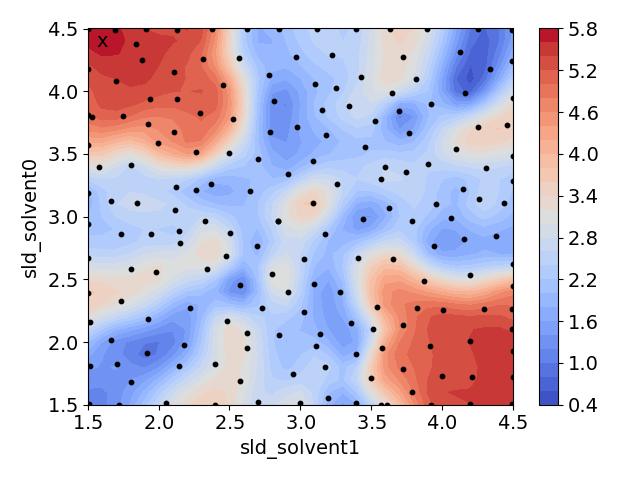

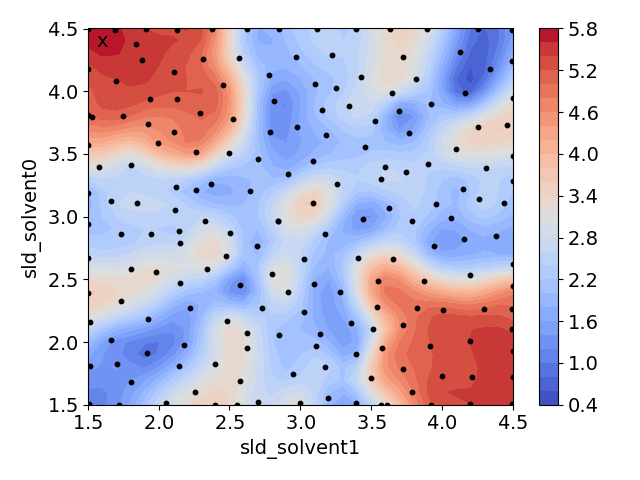

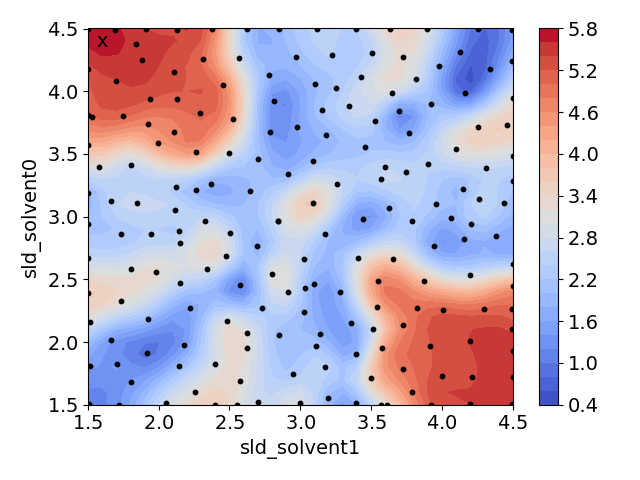

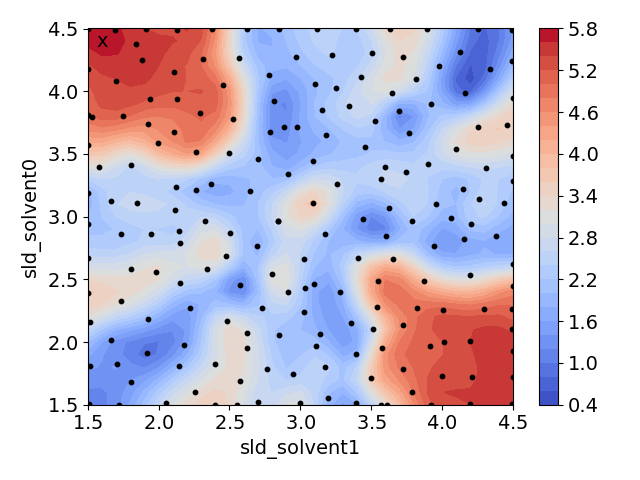

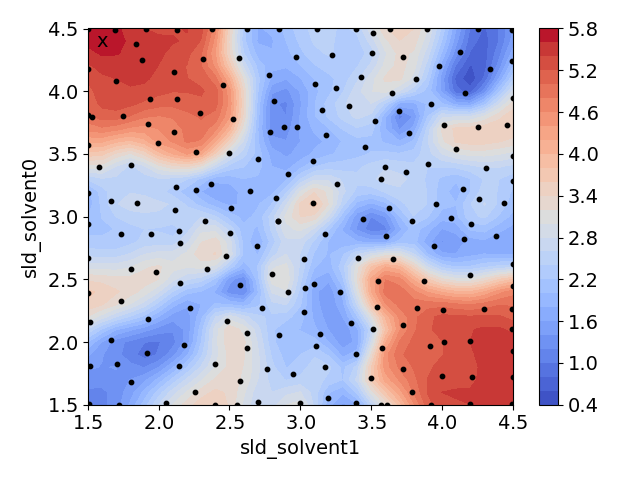

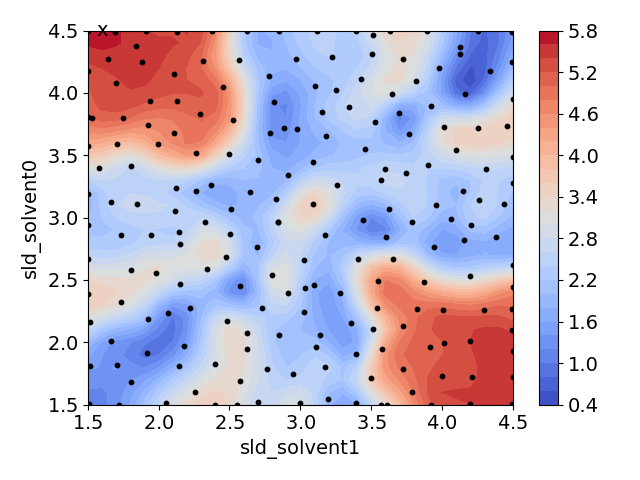

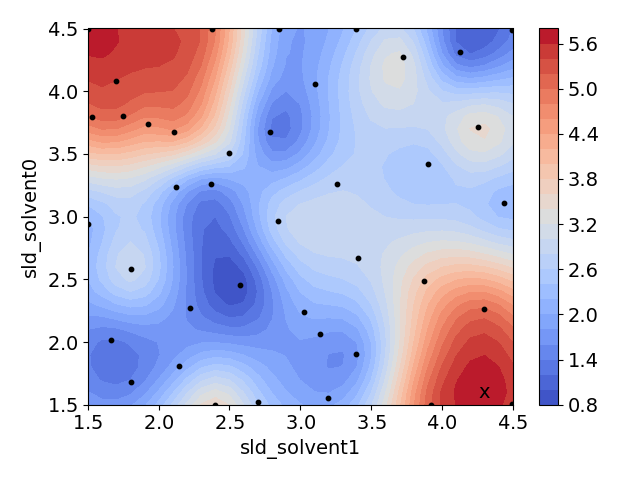

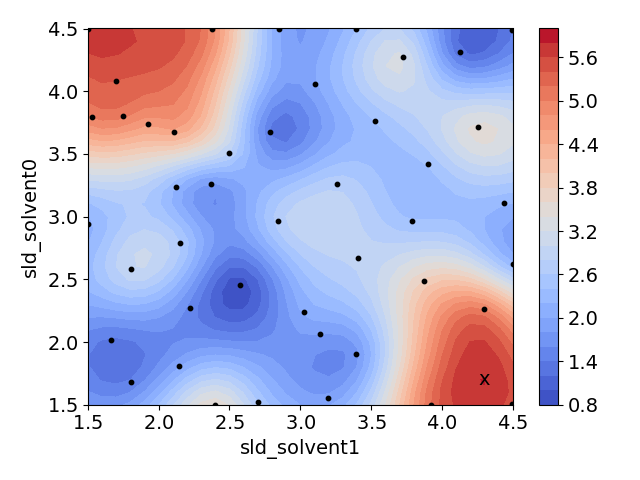

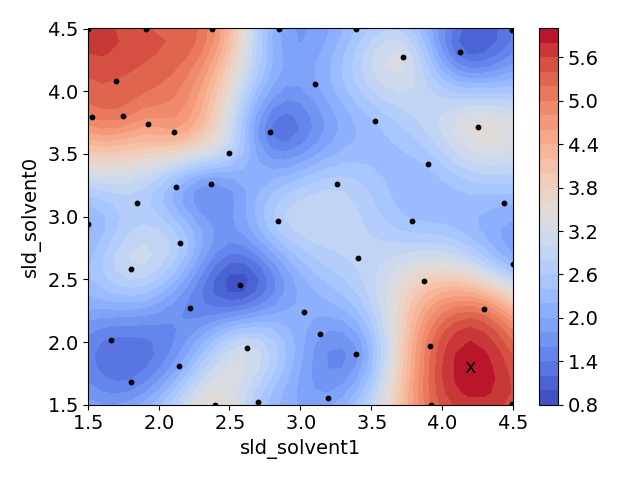

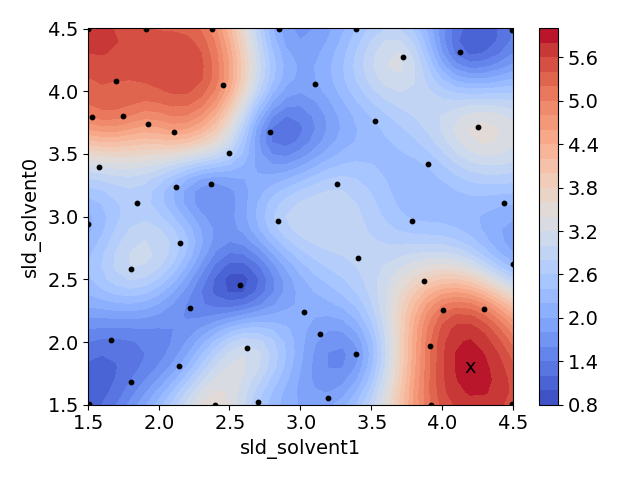

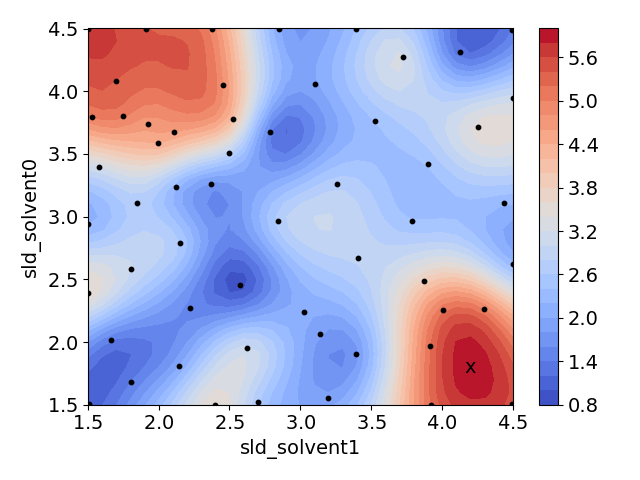

In [16]:
from IPython.display import Image, display
import glob
from os import path
for file in glob.glob(path.join(setupdir, 'plots', "*.png")):
    display(Image(filename=file))

In [17]:
import imageio.v2 as iio
import os
w = iio.get_writer(os.path.join(setupdir, 'plots','gpcam_timelapse.mp4'), format='FFMPEG', mode='I', fps=1)
i = 0
while os.path.isfile(os.path.join(setupdir, 'plots', 'prediction_gpcam'+str(i)+'.png')):
    im = iio.imread(os.path.join(setupdir, 'plots', 'prediction_gpcam'+str(i)+'.png'))
    w.append_data(im)
    i += 1
w.close()